##**Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import r2_score

##**Data Collection and Processing**

In [ ]:
data = pd.read_csv("tested.csv")

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
data.shape

(200, 4)

##**Data Visualization**

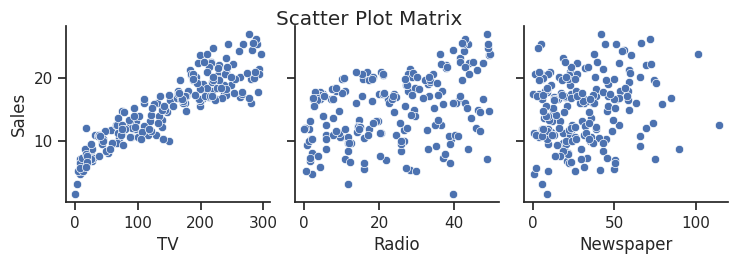

In [ ]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(data, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="scatter")
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

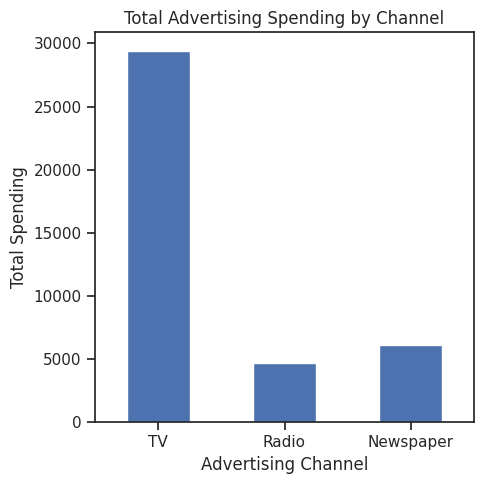

In [ ]:
advertising_channels = ['TV', 'Radio', 'Newspaper']
channel_sums = data[advertising_channels].sum()

plt.figure(figsize=(5, 5))
channel_sums.plot(kind='bar')
plt.xlabel('Advertising Channel')
plt.ylabel('Total Spending')
plt.title('Total Advertising Spending by Channel')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##**Separating features and target**

In [ ]:
x = data[["TV", "Radio", "Newspaper"]]
y = data[['Sales']]

In [ ]:
print(x.head())
print(y.head())

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
   Sales
0   22.1
1   10.4
2   12.0
3   16.5
4   17.9


In [ ]:
x.shape

(200, 3)

In [ ]:
y.shape

(200, 1)

##**Splitting the data into Train and Test Data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(160, 3) (40, 3) (160, 1) (40, 1)


##**Model Training**

**Using LinearRegression**

In [ ]:
model_1 = LinearRegression()

In [ ]:
model_1.fit(x_train, y_train)

LinearRegression()

**Using DecisionTreeRegressor**

In [ ]:
model_2 = DecisionTreeRegressor()

In [ ]:
model_2.fit(x_train, y_train)

DecisionTreeRegressor()

**Using RandomForestRegressor**

In [ ]:
model_3 = RandomForestRegressor()

In [ ]:
model_3.fit(x_train, y_train)

<ipython-input-62-f139d46745d1>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_3.fit(x_train, y_train)


RandomForestRegressor()

**Using GradientBoostingRegressor**

In [ ]:
model_4 = GradientBoostingRegressor()

In [ ]:
model_4.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

**Using XGBRegressor**


In [ ]:
model_5 = xgb.XGBRegressor()

In [ ]:
model_5.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

##**Model Evaluation**

In [ ]:
# Make prediction and check accuracy for model_1
x_test_prediction_1 = model_1.predict(x_test)
r2_score_1 = r2_score(y_test, x_test_prediction_1)

# Make prediction and check accuracy for model_2
x_test_prediction_2 = model_2.predict(x_test)
r2_score_2 = r2_score(y_test, x_test_prediction_2)

# Make prediction and check accuracy for model_3
x_test_prediction_3 = model_3.predict(x_test)
r2_score_3 = r2_score(y_test, x_test_prediction_3)

# Make prediction and check accuracy for model_4
x_test_prediction_4 = model_4.predict(x_test)
r2_score_4 = r2_score(y_test, x_test_prediction_4)

# Make prediction and check accuracy for model_5
x_test_prediction_5 = model_5.predict(x_test)
r2_score_5 = r2_score(y_test, x_test_prediction_5)

In [ ]:
regressor_scores = [
    ("LinearRegression", r2_score_1),
    ("DecisionTreeRegressor", r2_score_2),
    ("RandomForestRegressor", r2_score_3),
    ("GradientBoostingRegressor", r2_score_4),
    ("XGBRegressor", r2_score_5)
]

# Sort the regressor scores in descending order based on the R-squared score
sorted_regressor_scores = sorted(regressor_scores, reverse=True, key=lambda x: x[1])

# Print the sorted regressor scores
for regressor, score in sorted_regressor_scores:
    print(f"{regressor}\n R-squared score: {score}\n")

GradientBoostingRegressor
 R-squared score: 0.9618549995078011

RandomForestRegressor
 R-squared score: 0.9617050827053236

XGBRegressor
 R-squared score: 0.946912303285763

LinearRegression
 R-squared score: 0.9217965732000767

DecisionTreeRegressor
 R-squared score: 0.9205286130375637

